# Week 1

## Overview
As explained in during the in-class lecture, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## AI and this class

This class is *AI first*. This means that you're allowed to use LLMs to help in answering the questions. 

In fact, you could use a good model to do most (if not all) of the work for you. As I will discuss in detail during the lecture **you shouldn't always do that**. Part of the point of being here is learning how to do certain things using your human brain. To make you better at thinking. If you use the AI for everything you will get worse at thinking. 

And don't forget that the whole point of going to University in the first place is to get better at thinking. So if you just use the AI you're defeating the purpose of spending time at DTU. You'll be wasting your life.

On the other hand, there are many things that it's not important to do on your own. And how the h#ll do you tell what's what? How do you know when to use LLMs and when not to?

<div class="alert alert-block alert-info">
To be of assistance, I've designed a system of blue boxes that I use to clarify this issue. I basically tell you when LLMs are OK and when they don't! Awesome, right?
</div>

## Today

This first lecture covers:

1. **A case study in algorithmic accountability**: We'll explore predictive policing—what it promised, what went wrong, and what we can learn from it.
2. **Hands-on data analysis**: We'll go and grab real San Francisco crime data and start exploring it.

If you want to prepare, you might enjoy watching *Minority Report* (2002)—it's a surprisingly relevant film for this class.

---

# Part 1: Predictive Policing—A Cautionary Tale

For years, "predictive policing" was pitched as the future of law enforcement. The idea was simple: use data and algorithms to predict where crimes would occur, then deploy police resources accordingly. It connected to popular culture through shows like [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) and films like [Minority Report](https://www.imdb.com/title/tt0181689/). Companies like PredPol and Palantir built businesses selling these tools to police departments.

But the story didn't end the way proponents hoped.

**By the early 2020s, many cities abandoned these systems:**
- The **LAPD dropped PredPol in 2020** after audits showed it failed to reduce crime and disproportionately targeted Black and Latino neighborhoods
- **Santa Cruz became the first U.S. city to ban predictive policing** entirely
- Academic research revealed that these systems often **amplified existing biases** rather than providing objective predictions

This makes predictive policing a perfect case study for our class. It shows how data analysis and visualization can be powerful—but also how they can go wrong when we don't think carefully about bias, feedback loops, and the human consequences of algorithmic decisions.

Here's a video introduction to the topic:

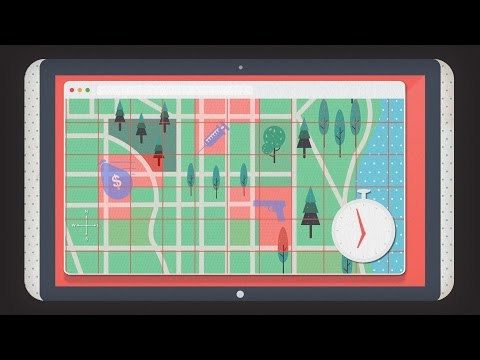

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM', width=800, height=450)

([Direct YouTube link](https://www.youtube.com/watch?v=YxvyeaL7NEM) if the embed doesn't work)

### Readings

Please read the following two pieces:

1. **[Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)** (ProPublica, 2016) — A landmark investigation into algorithmic bias in criminal risk assessment. While focused on sentencing rather than patrol allocation, it illustrates the core problems with using historical crime data to make predictions.

2. **[Dirty Data, Bad Predictions: How Civil Rights Violations Impact Police Data](https://www.nyulawreview.org/issues/volume-94-number-1/dirty-data-bad-predictions-how-civil-rights-violations-impact-police-data-predictive-policing-systems-and-justice/)** (Richardson et al., 2019) — This paper argues that police data itself is corrupted by historical discrimination, making any predictions based on retrospective fundamentally flawed. You can skim the legal details but pay attention to the core argument (it's even OK to get an LLM to summarize the data-science relevant parts for you).

> **Exercise 1.1**: After taking a look at the papers, answer the following in your own words:
>
> * The ProPublica article examines COMPAS, a risk assessment algorithm. What did they find about its accuracy for Black defendants vs. white defendants?
> * Richardson et al. argue that the *data itself* is problematic. Explain the concept of "dirty data" in your own words. Why can't we just "fix the algorithm" if the training data is biased? Do you agree with this argument?
> * Given what you've read, why do you think cities like Los Angeles and Santa Cruz decided to abandon predictive policing?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You can use an LLM to answer these questions. But don't do it!!! The goal is to engage with the readings and form your own understanding. You can use an LLM afterward to refine your writing, but the thinking should be yours.
</div>

1. Black defendants were assessed more likely to become crime to re-offend.

2. Dirty data is inaccurate, skewed, or systemically biased data. The idea is that even a perfect algorithm will produce biased outputs, if the data is biased. Historic data will stay the same

3. Because it didn't work, as crimed this decrease, and also they predicted wrong. 

---

# Part 2: Getting the Data

Now let's get our hands on some real crime data. We'll be working with San Francisco Police Department incident data, which is publicly available through [SF OpenData](https://data.sfgov.org).

We'll use data from **2018 to the present**. This dataset is cleaner and more consistently formatted than older data, and it covers an interesting period that includes the COVID-19 pandemic.

### Before You Code: Explore the Data

Before writing any code, spend a few minutes looking at the raw data:

> **Exercise 2.1**: Data exploration (no coding yet)
>
> * Go to https://data.sfgov.org and click on "Public Safety"
> * Find the dataset "Police Department Incident Reports: 2018 to Present"
> * Still on the website, scroll down the page and answer:
>   - What columns are available?
>   - What does each row represent?
>   - What time range does the data cover?
>   - What questions come to mind that this data might help answer?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Do this exploration yourself. Getting familiar with raw data before coding is crucial. It's one of the most important parts of data science!
</div>

1. Row ID, Incident Date, Incident Time, Incident Year, Incident Day of week, Report Datetime, Incident ID, Incident Category, Incident Subcategory, Incident Description, Latitude, Longitude. Many more still around 29 columns

2. 

3. From 2018 to Present

4. Can time and date have any relation? Does some incident relate to type of day or similar?

### Loading the Data

Now let's work with the data in Python. Load it into a Jupyter Notebook. Remember to use `pandas`, it is the standard tool for tabular data in Python. If you need a refresher, see the PythonBootcamp notebook

> **Exercise 2.2**: Load and clean the data
>
> * Download the "Police Department Incident Reports: 2018 to Present" dataset as a CSV
> * Load it into a pandas DataFrame
> * Keep only complete years (i.e., drop partial years at the start/end if the data doesn't begin on Jan 1 or end on Dec 31 of last year). (This is the first part that isn't super easy, so be patient). 
> * You'll want to keep at least: incident category, date/time, and location (both coordinates and police district)
> * Report:
>   - The total number of incidents in your cleaned dataset
>   - The date range covered
>   - The number of incident categories

If any of the above seems difficult, go back to the PythonBootcamp file and make sure your coding skillz are up to par.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You're welcome to use an LLM for help with pandas syntax, data cleaning, and debugging. This is exactly the kind of task where LLMs excel.
</div>

In [27]:
import pandas as pd

df = pd.read_csv("Police_Department_Incident_Reports__2018_to_Present_20260203.csv")

df["Incident Year"].dtype

df = df[df["Incident Year"] > 2018]

# Get the latest year in the dataset
latest_year = df["Incident Year"].max()
latest_year

# Drop all rows that are from the latest year
df = df[df["Incident Year"] < latest_year]
df["Incident Year"].max()
df["Incident Year"].min()

# print(df.head())

cleaned_cols = df[["Incident Category", "Incident Datetime", "Latitude", "Longitude", "Police District"]]
cleaned_cols.head()

,Incident Category,Incident Datetime,Latitude,Longitude,Police District
0,Drug Offense,2025/10/31 05:55:00 PM,37.752270,-122.417877,Mission
1,Assault,2025/06/13 12:41:00 PM,37.718128,-122.414177,Ingleside
2,Warrant,2025/11/03 02:00:00 PM,NaN,NaN,Out of SF
3,Larceny Theft,2025/05/21 12:00:00 AM,NaN,NaN,Ingleside
4,Larceny Theft,2025/10/23 12:00:00 AM,37.773800,-122.498253,Richmond


In [29]:
cleaned_cols.shape

(849809, 5)

In [30]:
# Report the three required items
print(f"Total number of incidents: {cleaned_cols.shape[0]}")
print(f"Date range: {df['Incident Datetime'].min()} to {df['Incident Datetime'].max()}")
print(f"Number of incident categories: {df['Incident Category'].nunique()}")

Total number of incidents: 849809
Date range: 2019/01/01 01:00:00 AM to 2025/12/31 12:53:00 AM
Number of incident categories: 49


---

# Part 3: Exploring Crime Categories

With the data loaded, let's start exploring. A natural first question: **what kinds of crimes occur in San Francisco?**

> **Exercise 3.1**: Crime categories
>
> * List all unique incident categories in the dataset
> * Count the number of incidents in each category
> * What is the most common category? The least common?

> **Exercise 3.2**: Visualize crime categories
>
> Create a bar chart showing the number of incidents by category.
>
> **Visualization tips:**
> * With many categories, a **horizontal bar chart** is often easier to read (category names fit better)
> * Sort bars by frequency (most common at top or bottom)
> * **Always label your axes** — a plot without labels is just a pretty shape (and makes me insane)
> * Consider whether you need to show *all* categories or just the top N (it's OK to make a choice here). You could also show categories with more than 1000 examples, etc.
> * What would happen if you used log-counts/or logarithmic axes?
> * Consider removing the uninformative categories, such as `Other Miscellaneous`, `Other Offenses`, etc.
> * Add a title that tells the reader what they're looking at

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Feel free to use an LLM for creating the visualization. But make sure you understand the code—you'll be making many more plots in this course.
</div>

## 3.1

In [33]:
1. 
unique_incident_category = df['Incident Category'].unique()
print(f"Unique incident categories: {unique_incident_category}")

Unique incident categories: ['Drug Offense' 'Assault' 'Warrant' 'Larceny Theft' 'Burglary' 'Robbery'
 'Fraud' 'Recovered Vehicle' 'Suspicious Occ' 'Motor Vehicle Theft'
 'Miscellaneous Investigation' 'Offences Against The Family And Children'
 'Other Offenses' 'Other' 'Disorderly Conduct' 'Malicious Mischief'
 'Other Miscellaneous' nan 'Non-Criminal' 'Traffic Violation Arrest'
 'Lost Property' 'Weapons Carrying Etc' 'Missing Person' 'Civil Sidewalks'
 'Embezzlement' 'Fire Report' 'Forgery And Counterfeiting' 'Case Closure'
 'Traffic Collision' 'Weapons Offense' 'Courtesy Report' 'Arson'
 'Liquor Laws' 'Vehicle Impounded' 'Vehicle Misplaced' 'Stolen Property'
 'Homicide' 'Motor Vehicle Theft?' 'Vandalism' 'Prostitution'
 'Sex Offense' 'Suicide' 'Rape' 'Drug Violation' 'Suspicious' 'Gambling'
 'Human Trafficking (A), Commercial Sex Acts' 'Weapons Offence'
 'Human Trafficking, Commercial Sex Acts'
 'Human Trafficking (B), Involuntary Servitude']


In [34]:
2.
print(f"Number of unique incident categories: {cleaned_cols['Incident Category'].nunique()}")

Number of unique incident categories: 49


In [36]:
3. 
most_common_incident = df['Incident Category'].value_counts().idxmax()
print(f"Most common incident category: {most_common_incident}")
print(f"Count: {df['Incident Category'].value_counts().max()}")

least_common_incident = df['Incident Category'].value_counts().idxmin()
print(f"Least common incident category: {least_common_incident}")
print(f"Count: {df['Incident Category'].value_counts().min()}")

Most common incident category: Larceny Theft
Count: 244295
Least common incident category: Human Trafficking (B), Involuntary Servitude
Count: 2


## 3.2

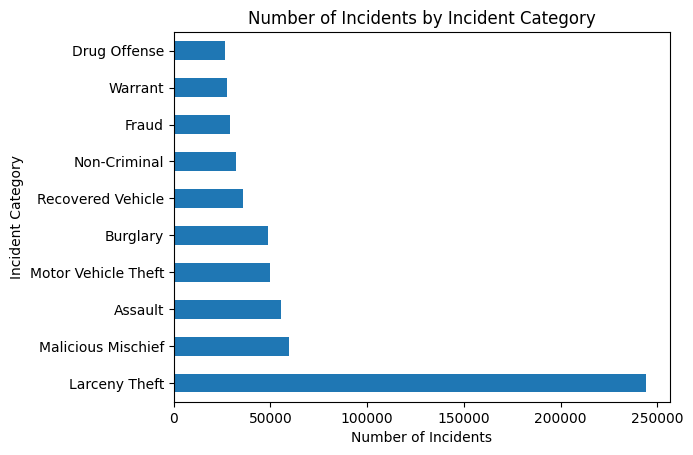

In [40]:
# Create horizontal bar chart for each incident category showing the number of incidents using pandas
# Remove Other Miscellaneous and Other Offences from the plot for better visualization
import matplotlib.pyplot as plt

counts = df['Incident Category'].value_counts()
counts = counts[(counts.index != 'Other Miscellaneous') & (counts.index != 'Other Offences')]
counts.head(10).plot(kind='barh')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Category')
plt.title('Number of Incidents by Incident Category')
plt.show()

---

# Part 4: Temporal Patterns

Static counts are useful, but crime isn't static—it changes over time. Let's investigate temporal patterns.

> **Exercise 4.1**: Yearly crime counts
>
> * Count the total number of incidents per year
> * Which year had the most incidents? The fewest?
> * Create a bar chart showing incidents by year
> * What do you notice? Any years that stand out? (Think about what was happening in the world...)

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Use an LLM freely for the data manipulation and plotting. Use your own brain for interpreting what you see.
</div>

In [42]:
# Count total number of incdents per year
incidents_per_year = df.groupby('Incident Year').size()
print(incidents_per_year)


Incident Year
2019    143027
2020    114601
2021    125336
2022    133048
2023    130932
2024    109116
2025     93749
dtype: int64


The year of 2019 was most crimes
The year 2025 had fewest

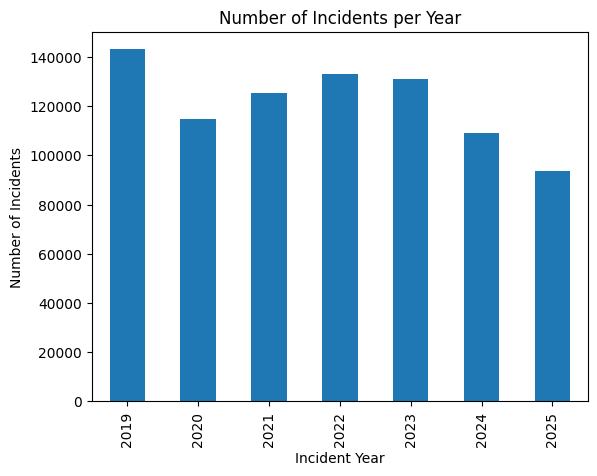

In [43]:
# Bar chart showing incidents per year
incidents_per_year.plot(kind='bar')
plt.xlabel('Incident Year')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents per Year')
plt.show()

I noticed that in 2020 the number of incidents dropped a bit, could be due to COVID
Could be after Donald Trump was elected as president in the United States the number of incidents dropped

### Focus Crimes

Looking at all crimes together can obscure important patterns. Different types of crime may have very different trends.

Let's focus on a subset of 16 crimes — I've chosen these as examples of serious & common crimes:

In [45]:
focus_crimes = [
  'Larceny Theft',
  'Assault',
  'Burglary',         
  'Motor Vehicle Theft',
  'Fraud',
  'Drug Offense',  
  'Missing Person',
  'Robbery',
  'Disorderly Conduct',
  'Weapons Offense',
  'Stolen Property',  
  'Arson',   
  'Traffic Collision',
  'Vandalism',
  'Sex Offense',
  'Prostitution',  
]

These crimes are worth examining individually because:
- They're serious enough to warrant police attention
- They are different enought to have different patterns and drivers
- Some (like drug offenses) are particularly susceptible to enforcement bias—more police presence leads to more arrests, which looks like more crime, which justifies more police presence...

> **Exercise 4.2**: Focus crime trends
>
> * Create a grid of subplots (e.g., 4x4) showing the year-by-year trend for each focus crime
> * Each subplot should show years on the x-axis and incident count on the y-axis
> * Make sure each subplot is labeled so viewers know what they're looking at
>
> **Visualization tips:**
> * When you have multiple subplots, you don't need to label every axis—shared labels on the edges are fine
> * Use `plt.tight_layout()` to prevent overlapping
> * Consider using consistent y-axis scales to enable comparison, OR let each scale independently to see patterns within each crime type (there are arguments for both approaches)

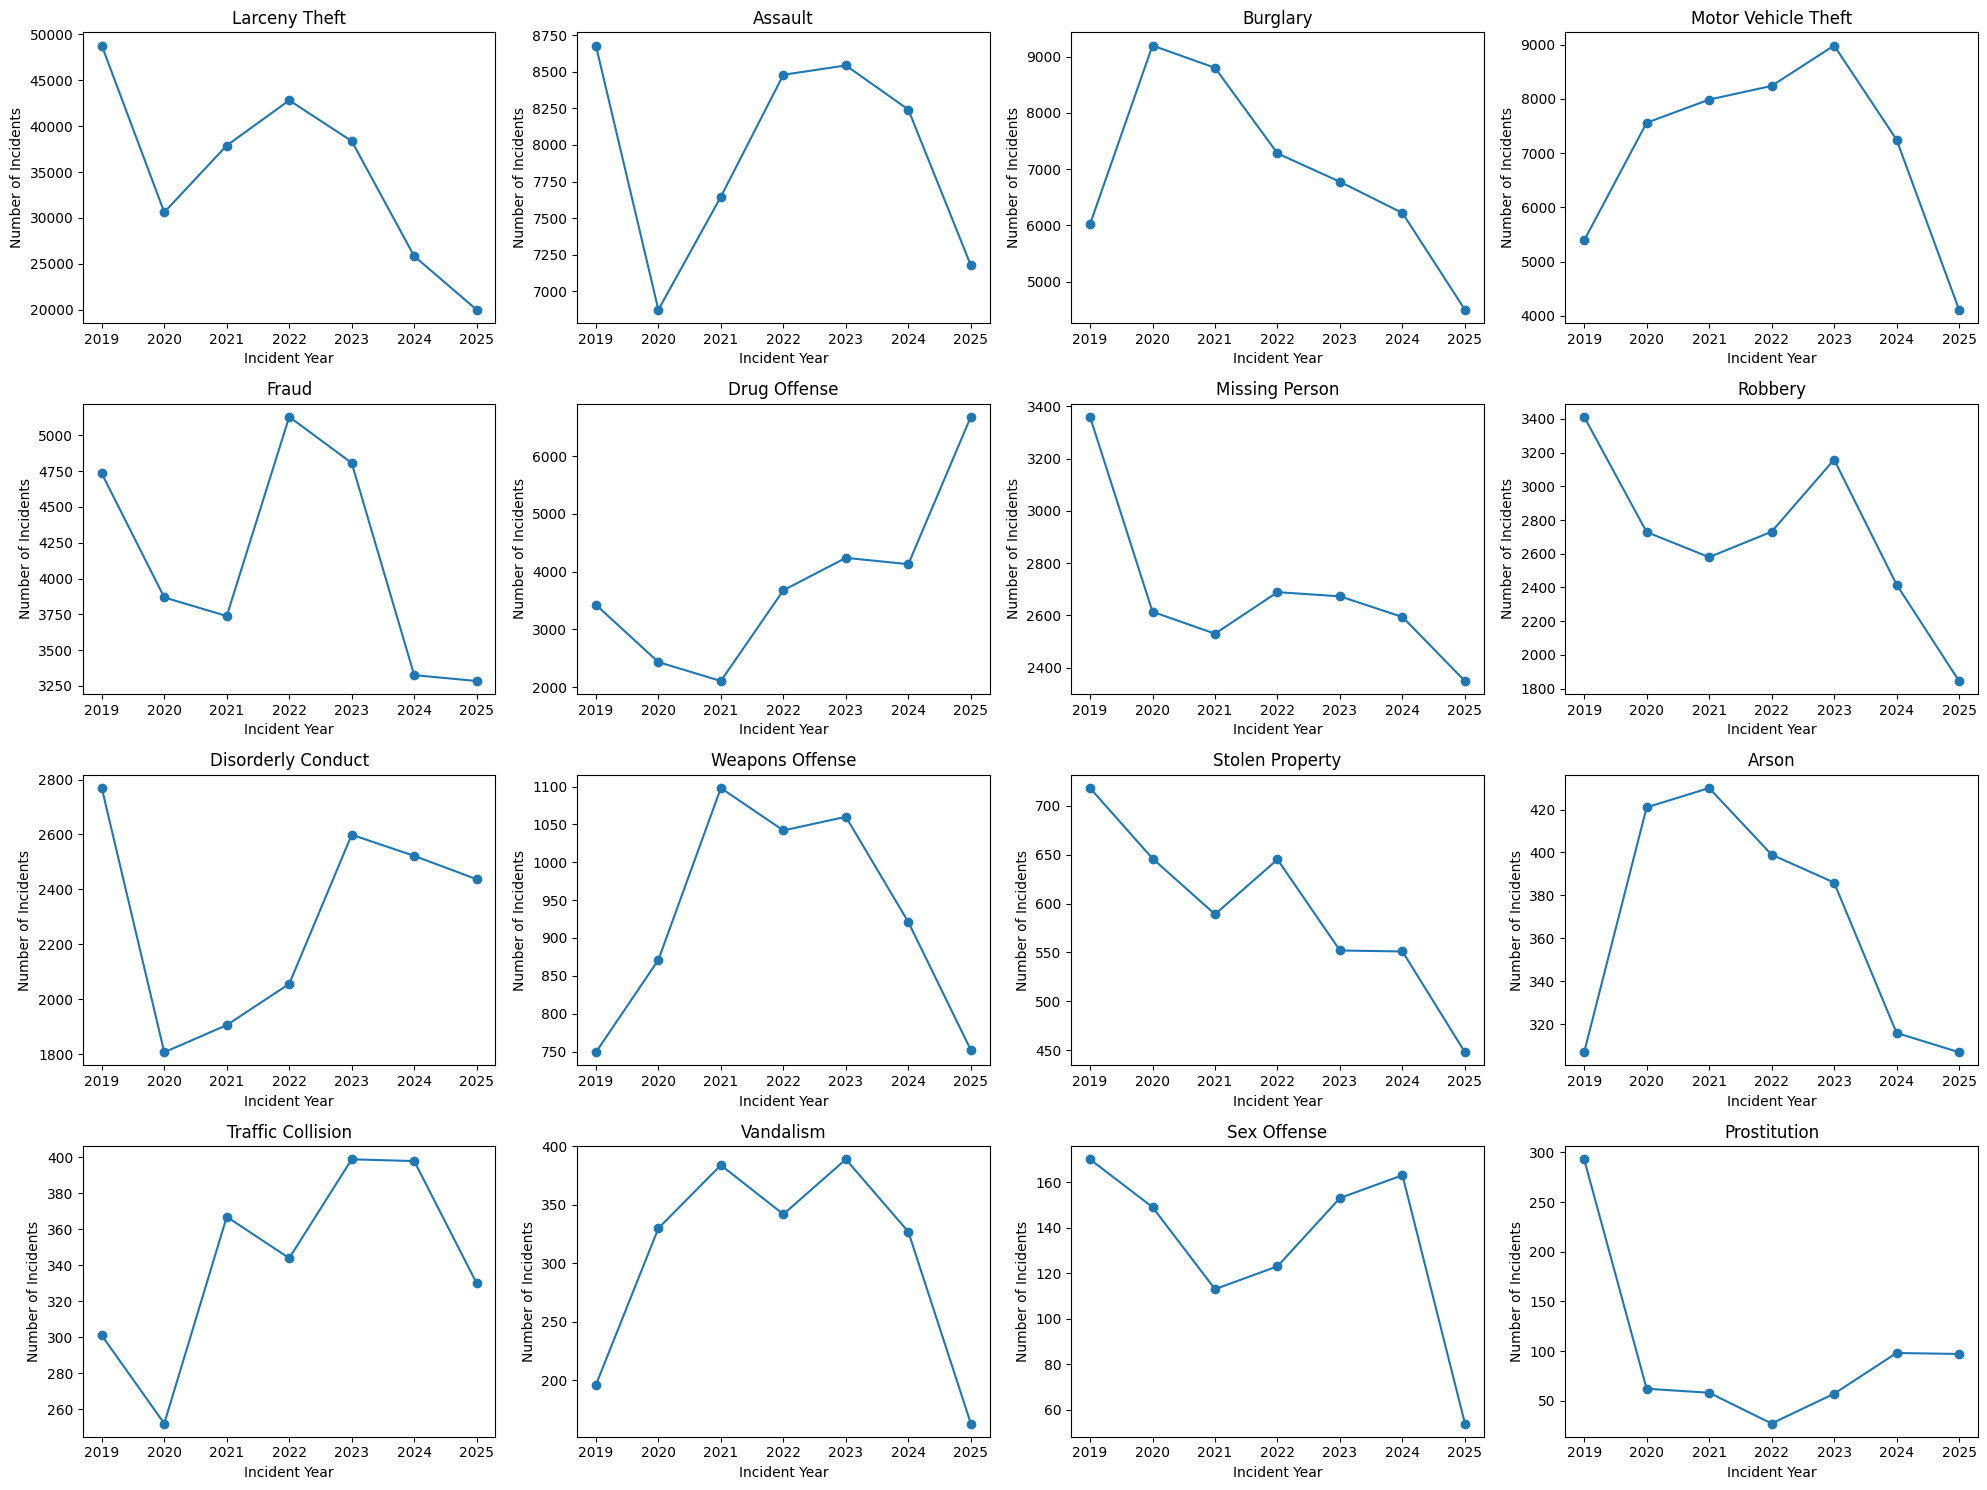

In [48]:
# Grid of subplots 4x4 showing year by year trend for each focus crime, labels are shared on the edges
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
for i, crime in enumerate(focus_crimes):
    ax = axs[i // 4, i % 4]
    crime_data = df[df['Incident Category'] == crime]
    incidents_per_year = crime_data.groupby('Incident Year').size()
    incidents_per_year.plot(kind='line', ax=ax, marker='o')
    ax.set_title(crime)
    ax.set_xlabel('Incident Year')
    ax.set_ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

> **Exercise 4.3**: Interpret your findings
>
> Look at the focus crime plots and comment on at least **three interesting patterns** you observe. Consider:
> * Do all crimes follow the same trend, or do different crimes behave differently?
> * Are there any sudden changes? What might explain them?
> * How might the COVID-19 pandemic (2020-2021) have affected different crime types?

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The interpretation should be your own thinking. This is where you practice data analysis reasoning.
</div>

Larceny theft might have dropped in 2020 (fewer people out = fewer opportunities)
Drug offenses might change based on enforcement (more/less policing)
Vehicle theft might have increased (more cars parked at home during lockdown)
Some crimes recovered post-pandemic, others didn't


---

## You've Completed Week 1!

You've loaded real-world data, created visualizations, identified patterns, and thought critically about the implications of using data in high-stakes contexts.

If you want to go further:
* Take a look at the data from before 2018
* If you want to go nuts, you can merge the two datasets. It's not easy because the crime-types are not consistent over time, but perhaps you can ask an LLM to help you identify which ones can be matched up.
* Experiment with your visualizations—try different color schemes, annotations, or plot types
* Look at other temporal patterns: Are there differences by day of week? Time of day?
* Explore the spatial data: Which police districts have the most crime? (We'll dig into this more in coming weeks)